# Google Stock Prediction using LSTM

Take stock price of any company you want and predicts its price by using LSTM.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock/GOOG.csv


# Import necessary libraries

In [2]:
import math
import numpy as np
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2024-02-08 02:15:58.435699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 02:15:58.435821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 02:15:58.585843: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
plt.style.use('seaborn')

/tmp/ipykernel_18/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Load the stock market dataset

In [4]:
Data = pd.read_csv('/kaggle/input/google-stock/GOOG.csv')

# Explore the dataset

In [5]:
Data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [6]:
Data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


Display descriptive statistics of numerical columns

In [7]:
Data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


Display descriptive statistics of all columns, including categorical ones

In [8]:
print(Data.describe(include='all'))

       symbol                       date        close         high  \
count    1258                       1258  1258.000000  1258.000000   
unique      1                       1258          NaN          NaN   
top      GOOG  2016-06-14 00:00:00+00:00          NaN          NaN   
freq     1258                          1          NaN          NaN   
mean      NaN                        NaN  1216.317067  1227.430934   
std       NaN                        NaN   383.333358   387.570872   
min       NaN                        NaN   668.260000   672.300000   
25%       NaN                        NaN   960.802500   968.757500   
50%       NaN                        NaN  1132.460000  1143.935000   
75%       NaN                        NaN  1360.595000  1374.345000   
max       NaN                        NaN  2521.600000  2526.990000   

                low         open        volume     adjClose      adjHigh  \
count   1258.000000  1258.000000  1.258000e+03  1258.000000  1258.000000   
unique 

Display information about the DataFrame

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [10]:
Data.shape

(1258, 14)

In [11]:
Data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [12]:
Data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [13]:
df = pd.DataFrame(Data)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [14]:
df = df.sort_values(by='date')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [15]:
# Searching for dublicated values by checking the date column
df['date'].duplicated().sum()

0

In [16]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [17]:
df = df.sort_values(by='date')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [18]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [19]:
DF = df.copy()
DF['date'] = pd.to_datetime(DF['date'])
# Set 'date' column as index
DF = DF.set_index('date')
DF

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [20]:
DF.drop(columns =['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'] , inplace=True)
DF

,symbol,close,high,low,open,volume
date,,,,,,
2016-06-14,GOOG,718.27,722.470,713.1200,716.48,1306065
2016-06-15,GOOG,718.92,722.980,717.3100,719.00,1214517
2016-06-16,GOOG,710.36,716.650,703.2600,714.91,1982471
2016-06-17,GOOG,691.72,708.820,688.4515,708.65,3402357
2016-06-20,GOOG,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
2021-06-07,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337


#  Visualization the data

TypeError: Could not convert string 'GOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOGGOOG' to numeric

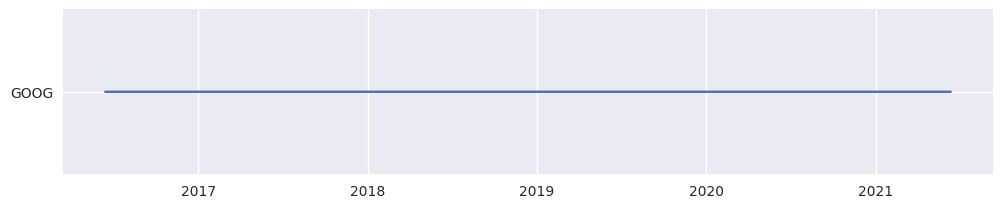

In [21]:


import matplotlib.pyplot as plt

# Ensure DF is a DataFrame containing the data
# Initialize number of rows and columns based on DataFrame shape
num_cols = len(DF.columns)
a = num_cols  # number of rows
b = 1          # number of columns
c = 1          # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()

# Initialize figure
fig = plt.figure(figsize=(12, 15))

for i in range(num_cols):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(DF[DF.columns[i]], color=color)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axhline(DF[DF.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    plt.title("Google "+ DF.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    plt.ylabel(DF.columns[i])
    plt.legend([DF.columns[i]])
    c += 1

# Tighten layout
plt.tight_layout()

# Display the plot
plt.show()


# Trainning and Testing the model

In [ ]:
training_set = DF[:'2020'].iloc[:,0:1].values
test_set = DF['2020':].iloc[:,0:1].values

In [ ]:
# Using 'close' price for prediction.
DF['close'][:'2020'].plot(figsize=(16,4),legend=True)
DF['close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
timesteps = 60

In [ ]:
"""
Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output.
For each element of training set, we have 60 previous training set elements.

"""

X_train = []
y_train = []
for i in range(timesteps,1147):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
"""
We get the test set ready in a similar way as the training set.
The following has been done so first 60 entires of test set have 60 previous values
which is impossible to get unless we take the whole 'High' attribute data for processing

"""

dataset_total = pd.concat((DF['close'][:'2020'], DF['close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Develop the model

In [ ]:
# The LSTM architecture
Model = Sequential()
# First LSTM layer with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))
# Second LSTM layer
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
# Third LSTM layer
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
# Fourth LSTM layer
##add 4th lstm layer
#Model.add(layers.LSTM(units = 100))
#Model.add(layers.Dropout(rate = 0.2))

Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))
# The output layer
Model.add(Dense(units = 1))

Model.summary()

In [ ]:
# Compiling the model
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [ ]:
# Epochs and Batch Size
epochs = 15
batch_size = 32

In [ ]:
#from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 2, restore_best_weights = True)
  
# Fitting the model 
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'loss' and 'epochs'

# Plotting the training loss
plt.plot(epochs, loss, 'b', label='Training loss', linewidth=2)

# Adding title with custom font size and weight
plt.title('Training Loss', size=20, weight='bold')

# Adding x and y axis labels with custom font size and weight
plt.xlabel('Epochs', fontsize=15, weight='bold')
plt.ylabel('Loss', fontsize=15, weight='bold')

# Setting the legend at the best location
plt.legend(loc='best', fontsize=12)

# Adjusting the plot's figure size
plt.figure(figsize=(10, 6))

# Showing the plot
plt.show()


In [ ]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)